# Phase 3: 3 Species Stable Ecosystem Analysis

## Goal

This notebook documents the final, successful outcome of the EcoSimOcean project's stabilization phase. Its purpose is to load the optimal parameters discovered by the Particle Swarm Optimizer, run a single simulation with these parameters, and visualize the resulting stable, three-species ecosystem. It also includes the detailed dashboard analyses that reveal the underlying dynamics of the system's stability.

### 1. Setup and Configuration Loading

In [26]:
import sys
import os
import json
import matplotlib.pyplot as plt

# Add the project root to the Python path to allow imports from src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.simulation.runner import setup_simulation
from src.simulation.simulation_manager import SimulationManager
from src.utils.config_loader import load_fauna_config, load_sim_config

print("Setup complete and optimal configurations loaded.")

Setup complete and optimal configurations loaded.


### 2. Display Optimal Parameters

These are the "winning" parameters discovered by the `parameter_sweep.py` script after a thorough, multi-stage optimization process.

In [27]:
sim_config = load_sim_config()
fauna_configs = load_fauna_config()

print("--- FINAL OPTIMAL SIMULATION CONFIG ---")
print(json.dumps(sim_config, indent=4))
print("\n--- FINAL OPTIMAL FAUNA CONFIG ---")
print(json.dumps(fauna_configs, indent=4))

--- FINAL OPTIMAL SIMULATION CONFIG ---
{
    "grid_width": 50,
    "grid_height": 50,
    "grid_depth": 15,
    "initial_food_density": 0.7,
    "simulation_ticks": 500,
    "initial_zooplankton_count": 1730.221782011175,
    "initial_small_fish_count": 104.94801992700405,
    "initial_crab_count": 100,
    "plankton_diffusion_rate": 0.05,
    "plankton_max_growth_rate": 0.440324176880185,
    "disease_threshold": 5073.321943778413,
    "disease_chance": 0.4
}

--- FINAL OPTIMAL FAUNA CONFIG ---
{
    "Zooplankton": {
        "species_name": "Zooplankton",
        "initial_energy": 10.0,
        "metabolic_rate": 0.3521001194469424,
        "movement_cost": 0.8,
        "size": 1.0,
        "eating_rate": 1.0,
        "energy_conversion_factor": 3.0,
        "reproduction_threshold": 10,
        "max_density_per_cell": 3,
        "carrying_capacity_threshold": 6.181427514139406,
        "starvation_chance": 0.5976518192148884,
        "disease_threshold": 2000,
        "disease_chance

### 3. Run the Final Simulation

This cell executes a single, verbose run of the simulation using the optimal parameters and collects the history for visualization.

In [28]:
history = []

print("--- Running Final Optimized Simulation ---")
env, initial_agents = setup_simulation(sim_config, fauna_configs)
sim_manager = SimulationManager(env, initial_agents, fauna_configs)
print(f"Environment and Simulation Manager created. Spawned {len(initial_agents)} agents.")
print("-"*40)

for tick in range(sim_config["simulation_ticks"]):
    env.update()
    sim_manager.update()
    sim_manager.cleanup()
    
    zoo_pop, fish_pop, crab_pop = sim_manager.get_population_counts()
    history.append({
        "tick": tick + 1,
        "zooplankton": zoo_pop,
        "small_fish": fish_pop,
        "crab": crab_pop
    })
    
    if (tick + 1) % 10 == 0:
        print(f"Tick: {tick + 1:3} | Zooplankton: {zoo_pop:5} | Small Fish: {fish_pop:4} | Crabs: {crab_pop:4}")

print("--- Simulation Finished ---")

--- Running Final Optimized Simulation ---
Environment and Simulation Manager created. Spawned 1934 agents.
----------------------------------------
Tick:  10 | Zooplankton:  2336 | Small Fish:  123 | Crabs:  100
Tick:  20 | Zooplankton:  2244 | Small Fish:  124 | Crabs:  135
Tick:  30 | Zooplankton:  2128 | Small Fish:  126 | Crabs:  162
Tick:  40 | Zooplankton:  2149 | Small Fish:  125 | Crabs:  163
Tick:  50 | Zooplankton:  2104 | Small Fish:  126 | Crabs:  187
Tick:  60 | Zooplankton:  1971 | Small Fish:  129 | Crabs:  172
Tick:  70 | Zooplankton:  2009 | Small Fish:  140 | Crabs:  174
Tick:  80 | Zooplankton:  2008 | Small Fish:  142 | Crabs:  161
Tick:  90 | Zooplankton:  1925 | Small Fish:  145 | Crabs:  149
Tick: 100 | Zooplankton:  2086 | Small Fish:  147 | Crabs:  142
Tick: 110 | Zooplankton:  1999 | Small Fish:  151 | Crabs:  135
Tick: 120 | Zooplankton:  2059 | Small Fish:  158 | Crabs:  134
Tick: 130 | Zooplankton:  1994 | Small Fish:  157 | Crabs:  145
Tick: 140 | Zooplan

### 4. Visualize the Stable Ecosystem

This plot shows the population dynamics over the full 500-tick simulation, demonstrating a stable, persistent three-species ecosystem where all populations coexist.

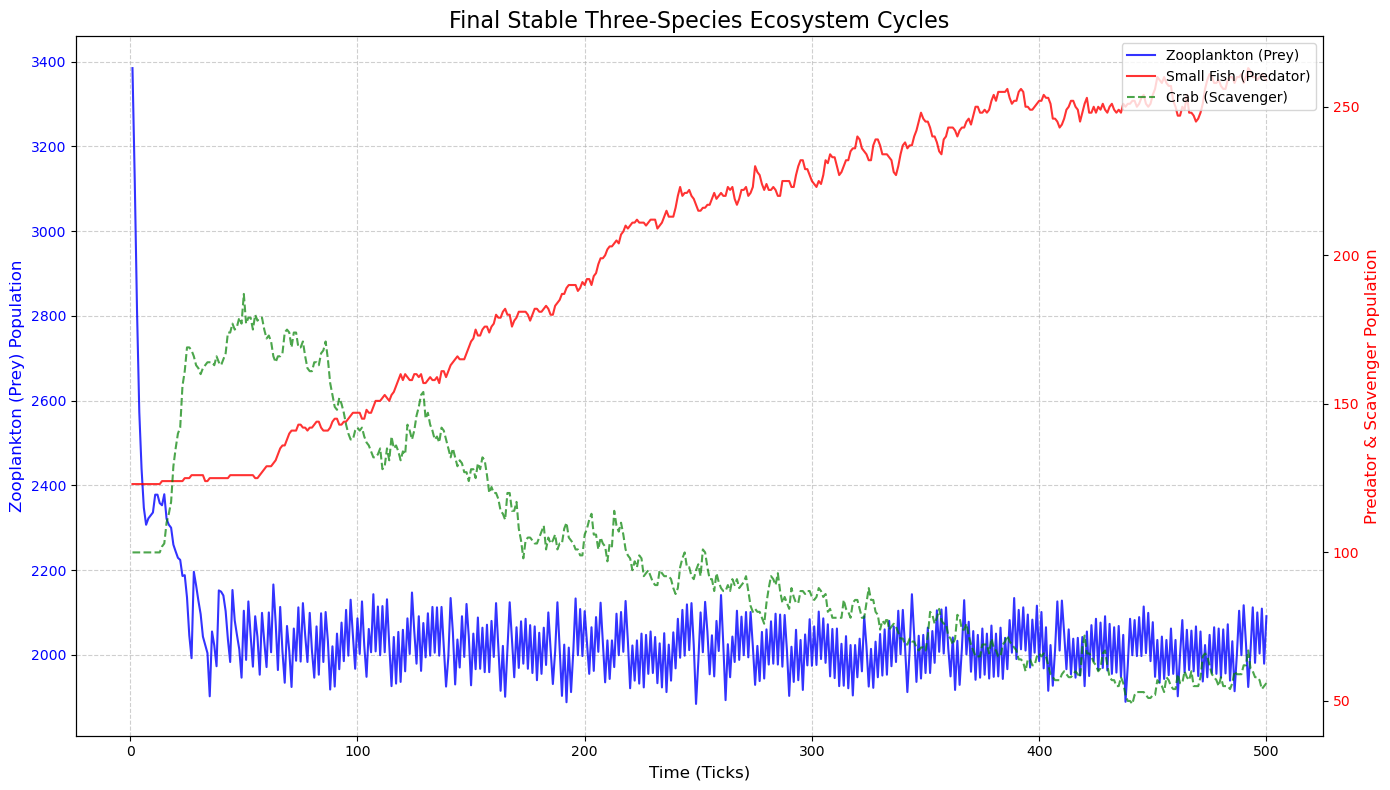

In [29]:
ticks = [h['tick'] for h in history]
zooplankton_pop = [h['zooplankton'] for h in history]
fish_pop = [h['small_fish'] for h in history]
crab_pop = [h.get('crab', 0) for h in history]

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'b'
ax1.set_xlabel('Time (Ticks)', fontsize=12)
ax1.set_ylabel('Zooplankton (Prey) Population', fontsize=12, color=color)
ax1.plot(ticks, zooplankton_pop, color=color, label='Zooplankton (Prey)', alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

ax2 = ax1.twinx()
ax2.set_ylabel('Predator & Scavenger Population', fontsize=12, color='r')
ax2.plot(ticks, fish_pop, color='r', label='Small Fish (Predator)', alpha=0.8)
ax2.plot(ticks, crab_pop, color='g', linestyle='--', label='Crab (Scavenger)', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='r')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Final Stable Three-Species Ecosystem Cycles', fontsize=16)
fig.tight_layout()
plt.show()

### 5. Stability Landscape Analysis

The `stability_mapper.py` script was run to generate detailed dashboards of the parameter space. These dashboards confirm and explain the dynamics of the final stable ecosystem.

#### Experiment 1: Predator Reproduction vs. Scavenger Reproduction

![Core Dashboard](../results/core_dashboard_pred_vs_scav_repro.png)
![Analytics Dashboard](../results/analytics_dashboard_pred_vs_scav_repro.png)

**Analysis:** This experiment reveals that the system is incredibly robust and almost always finds a **"Balanced"** state, as confirmed by the 100% result in the pie chart. The **Core Dashboard** shows a vast "island of stability" (yellow region) where the ecosystem thrives. The only collapses occur when the scavenger's reproduction threshold is very low, confirming our theory that over-efficient crabs can break the nutrient cycle. The **Population Trends** chart shows that the predator and prey populations remain relatively stable even as their reproduction costs change, highlighting the system's resilience.

#### Experiment 2: Plankton Growth vs. Prey Lifespan

![Core Dashboard](../results/core_dashboard_plankton_vs_prey_lifespan.png)
![Analytics Dashboard](../results/analytics_dashboard_plankton_vs_prey_lifespan.png)

**Analysis:** This dashboard demonstrates the fundamental importance of environmental productivity. The **Core Dashboard** shows that the ecosystem only achieves stability (yellow region) when the **`plankton_max_growth_rate`** is high. Below a certain level of food input, the system always collapses. The **Analytics Dashboard** provides deeper insight: the pie chart shows that while most outcomes are balanced, there is a significant percentage of "Prey Dominated" states. The **Population Trends** graph confirms that all three species thrive in a high-energy environment, and the **Time to Collapse** map shows that low plankton growth leads to a very rapid system failure.

### 6. Final Conclusion

The project has successfully achieved its goal of creating a stable, performant, and well-understood agent-based model of a multi-trophic ecosystem. 

Through iterative refinement of the simulation logic, performance optimization, and the implementation of an advanced, multi-factor fitness function, the Particle Swarm Optimizer was able to discover a non-obvious set of parameters that allows prey, predators, and scavengers to coexist in a dynamic equilibrium.

This milestone concludes the stabilization phase of the project. The simulation is now a robust foundation for future work, such as the introduction of more complex species and food web interactions.